# Capstone Project
### This Notebook is used for Capstone project on Accident seviarity Predictions

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
print('Hello Capstone Project Course')

In [1]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


## Introduction/Business Problem


People are daily driving to another city for work or to visit some friends. There could be chances that people may met with an accidents and get serverly injured or may die.
The problem now how to identify or predict what are the chances of getting into accidents and how severe it would be.
We will be creating a machelearnig model that could warn you, given the weather and the road conditions about the possibility of you getting into a car accident and how severe it would be, so that one would drive more carefully or even change your travel if they are able to


## Data Understanding

Our predictor or target variable will be 'SEVERITYCODE' because it is used measure the severity of an accident from 0 to 5 within the dataset. Attributes used to weigh the severity of an accident are 'WEATHER', 'ROADCOND' and 'LIGHTCOND'.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss, jaccard_similarity_score, f1_score
from sklearn import preprocessing
from scipy import stats
%matplotlib inline

In [3]:
df=df_data_1

In [4]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
df.shape

(194673, 38)

In [6]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

## Metadata

<

| Attribute       	| Data type, length 	| Description                                                 	|
|-----------------	|-------------------	|-------------------------------------------------------------	|
| OBJECTID        	| ObjectID          	| ESRI unique identifier                                      	|
| SHAPE           	| Geometry          	| ESRI geometry field                                         	|
| INCKEY          	| Long              	| A unique key for the incident                               	|
| COLDETKEY       	| Long              	| Secondary key for the incident                              	|
| ADDRTYPE        	| Text, 12          	| Collision address type:                                     	|
|                 	|                   	| ·           Alley                                           	|
|                 	|                   	| ·           Block                                           	|
|                 	|                   	| ·           Intersection                                    	|
| INTKEY          	| Double            	| Key that corresponds to the intersection                    	|
|                 	|                   	| associated with a collision                                 	|
| LOCATION        	| Text, 255         	| Description of the general location of the                  	|
|                 	|                   	| collision                                                   	|
| EXCEPTRSNCODE   	| Text,   10        	|                                                             	|
| EXCEPTRSNDESC   	| Text,   300       	|                                                             	|
| SEVERITYCODE    	| Text, 100         	| A code that corresponds to the severity of the collision:   	|
|                 	|                   	| ·           3—fatality                                      	|
|                 	|                   	| ·           2b—serious injury                               	|
|                 	|                   	| ·           2—injury                                        	|
|                 	|                   	| ·           1—prop damage                                   	|
|                 	|                   	| ·           0—unknown                                       	|
| SEVERITYDESC    	| Text              	| A detailed description of the severity of the               	|
|                 	|                   	| collision                                                   	|
| COLLISIONTYPE   	| Text,   300       	| Collision type                                              	|
| PERSONCOUNT     	| Double            	| The total number of people involved in the                  	|
|                 	|                   	| collision                                                   	|
| PEDCOUNT        	| Double            	| The number of pedestrians involved in the                   	|
|                 	|                   	| collision. This is entered by   the state.                  	|
| PEDCYLCOUNT     	| Double            	| The number of bicycles involved in the collision.           	|
|                 	|                   	| This is entered by the state.                               	|
| VEHCOUNT        	| Double            	| The number of vehicles involved in the collision.           	|
|                 	|                   	| This is entered by the state.                               	|
| INJURIES        	| Double            	| The number of total injuries in the collision. This         	|
|                 	|                   	| is entered by the state.                                    	|
| SERIOUSINJURIES 	| Double            	| The number of serious injuries in the collision.            	|
|                 	|                   	| This is entered by the state.                               	|
| FATALITIES      	| Double            	| The number of fatalities in the collision. This is          	|
|                 	|                   	| entered by the state.                                       	|
| INCDATE         	| Date              	| The date of the incident.                                   	|
| INCDTTM         	| Text,   30        	| The date and time of the incident.                          	|
|                 	|                   	| Category of junction at which collision took                	|
| JUNCTIONTYPE    	| Text,   300       	| place                                                       	|
| SDOT_COLCODE    	| Text,   10        	| A code given to the collision by SDOT.                      	|
| SDOT_COLDESC    	| Text, 300         	| A description of the collision corresponding to             	|
|                 	|                   	| the collision code.                                         	|
|                 	|                   	| Whether or not collision was due to inattention.            	|
| INATTENTIONIND  	| Text,   1         	| (Y/N)                                                       	|
| UNDERINFL       	| Text, 10          	| Whether or not a driver involved was under the              	|
|                 	|                   	| influence of drugs or alcohol.                              	|
| WEATHER         	| Text, 300         	| A description of the weather conditions during              	|
|                 	|                   	| the time of the collision.                                  	|
| ROADCOND        	| Text,   300       	| The condition of the road during the collision.             	|
| LIGHTCOND       	| Text,   300       	| The light conditions during the collision.                  	|
| PEDROWNOTGRNT   	| Text, 1           	| Whether or not the pedestrian right of way was              	|
|                 	|                   	| not granted. (Y/N)                                          	|
| SDOTCOLNUM      	| Text,   10        	| A number given to the collision by SDOT.                    	|
| SPEEDING        	| Text, 1           	| Whether or not speeding was a factor in the                 	|
|                 	|                   	| collision. (Y/N)                                            	|
| ST_COLCODE      	| Text, 10          	| A code provided by the state that describes the collision.  	|
|                 	|                   	| Dictionary.                                                 	|
| ST_COLDESC      	| Text, 300         	| A description that corresponds to the state’s               	|
|                 	|                   	| coding designation.                                         	|
| SEGLANEKEY      	| Long              	| A key for the lane segment in which the collision           	|
|                 	|                   	| occurred.                                                   	|
| CROSSWALKKEY    	| Long              	| A key for the crosswalk at which the collision              	|
|                 	|                   	| occurred.                                                   	|
| HITPARKEDCAR    	| Text, 1           	| Whether or not the collision involved hitting a             	|
|                 	|                   	| parked car. (Y/N)                                           	|

Many of the columns either hold a key or code, these colummns can be removed from the dataframe. For columns which are not defined in metadata will also be dropped. STATUS and SEVERITYCODE.1 are not present in metadata. I am not deleting OBJECTID as it is a unique key and can be helpful in plotting. 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'INTKEY', 'EXCEPTRSNCODE','EXCEPTRSNDESC', 'SEVERITYCODE.1','SEVERITYDESC','SDOT_COLCODE', 'SDOT_COLDESC',, 'SDOTCOLNUM','ST_COLCODE', 'ST_COLDESC','SEGLANEKEY', 'CROSSWALKKEY'

In [7]:
df.drop(['INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'INTKEY', 'EXCEPTRSNCODE','EXCEPTRSNDESC', 'SEVERITYCODE.1','SEVERITYDESC'
,'SDOT_COLCODE', 'SDOT_COLDESC', 'SDOTCOLNUM', 'ST_COLDESC','SEGLANEKEY', 'CROSSWALKKEY'],axis=1,inplace=True)

In [8]:
def ShowSummary(df):

    col_name = round(100*(df.isna().sum()/len(df)), 2)
    col_nuniq = df.nunique()    
    df_smry = pd.DataFrame({"data_type": df.dtypes,
                           "percent_missing_values": col_name,
                           "total_unique_values": col_nuniq}).sort_values(by=["percent_missing_values"],
                                                                            ascending=False)
    return df_smry

In [9]:
ShowSummary(df)

,data_type,percent_missing_values,total_unique_values
PEDROWNOTGRNT,object,97.60,1
SPEEDING,object,95.21,1
INATTENTIONIND,object,84.69,1
JUNCTIONTYPE,object,3.25,7
Y,float64,2.74,23839
X,float64,2.74,23563
LIGHTCOND,object,2.66,9
WEATHER,object,2.61,11
ROADCOND,object,2.57,9
COLLISIONTYPE,object,2.52,10


In [10]:
# Lets add date values for analysis

df["year"] = pd.DatetimeIndex(df.INCDATE).year 
df["month"] = pd.DatetimeIndex(df.INCDATE).month  
df["day"] = pd.DatetimeIndex(df.INCDATE).day  
df['dayofweek']= pd.DatetimeIndex(df.INCDATE).dayofweek
df['Hour'] = pd.DatetimeIndex(df.INCDTTM).hour.astype(int)

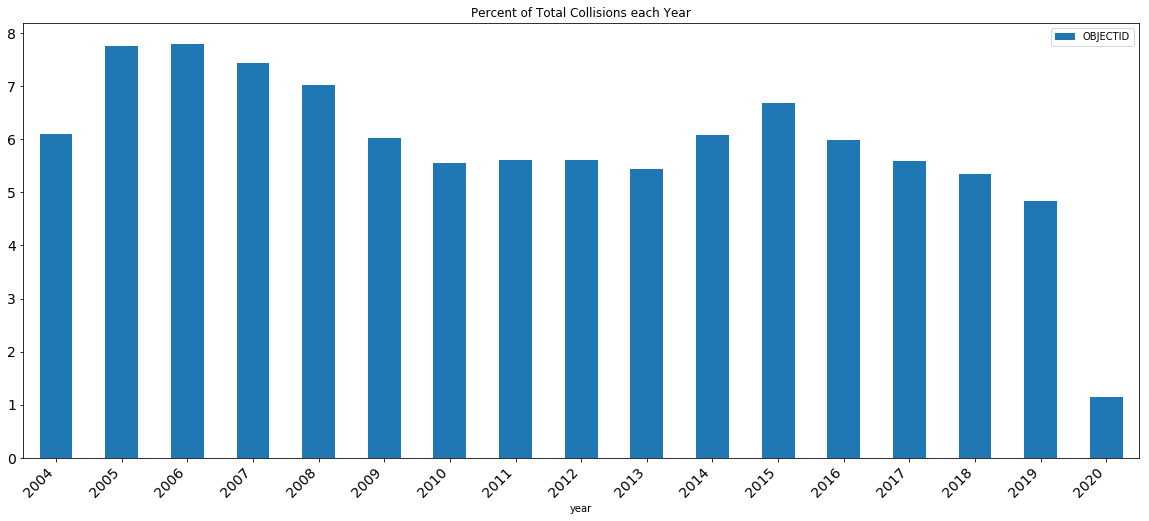

In [11]:
df_yr = round(100*(df[["year","OBJECTID"]].groupby(by=["year"]).count()/len(df)), 2)
# create a bar chart for visualization 
df_yr.plot(kind='bar', figsize=(20, 8));
plt.title("Percent of Total Collisions each Year");
plt.xticks(rotation=45, ha='right', size=14);
plt.yticks(size=14);
plt.show();

In [12]:
#It is quite evident that 2020 has very less data compared to other years. this will cause unnecessary noise in prediction.
#let's remove reccords from 2020
df = df[df["year"] != 2020]
print(df.shape)

(192428, 28)


In [13]:
#As per meta data  INATTENTIONIND, UNDERINFL,PEDROWNOTGRNT, SPEEDING, HITPARKEDCAR are indicators, let's see what values they have
print("INATTENTIONIND",df['INATTENTIONIND'].value_counts())
print("UNDERINFL",df['UNDERINFL'].value_counts())
print("PEDROWNOTGRNT",df['PEDROWNOTGRNT'].value_counts())
print("SPEEDING",df['SPEEDING'].value_counts())
print("HITPARKEDCAR",df['HITPARKEDCAR'].value_counts())

INATTENTIONIND Y    29805
Name: INATTENTIONIND, dtype: int64
UNDERINFL N    99013
0    80394
Y     5126
1     3995
Name: UNDERINFL, dtype: int64
PEDROWNOTGRNT Y    4631
Name: PEDROWNOTGRNT, dtype: int64
SPEEDING Y    9261
Name: SPEEDING, dtype: int64
HITPARKEDCAR N    185524
Y      6904
Name: HITPARKEDCAR, dtype: int64


In [14]:
# let's clean the identifiers based on the uniques values in it
df["INATTENTIONIND"].replace(np.nan, 0, inplace=True)
df["INATTENTIONIND"].replace('Y',1, inplace=True)
df[["INATTENTIONIND"]] = df[["INATTENTIONIND"]].astype("int")

df["UNDERINFL"].replace(np.nan, 0, inplace=True)
df["UNDERINFL"].replace('N',0, inplace=True)
df["UNDERINFL"].replace('Y',1, inplace=True)
df[["UNDERINFL"]] = df[["UNDERINFL"]].astype("int")

df["PEDROWNOTGRNT"].replace(np.nan, 0, inplace=True)
df["PEDROWNOTGRNT"].replace('Y',1, inplace=True)
df[["PEDROWNOTGRNT"]] = df[["PEDROWNOTGRNT"]].astype("int")

df["SPEEDING"].replace(np.nan, 0, inplace=True)
df["SPEEDING"].replace('Y',1, inplace=True)
df[["SPEEDING"]] = df[["SPEEDING"]].astype("int")

df["HITPARKEDCAR"].replace('N',0, inplace=True)
df["HITPARKEDCAR"].replace('Y',1, inplace=True)
df[["HITPARKEDCAR"]] = df[["HITPARKEDCAR"]].astype("int")

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


LIGHTCOND                            count
Daylight                  115407
Dark - Street Lights On    48104
Unknown                    17860
Dusk                        5862
Dawn                        2480
Dark - No Street Lights     1522
Dark - Street Lights Off    1193


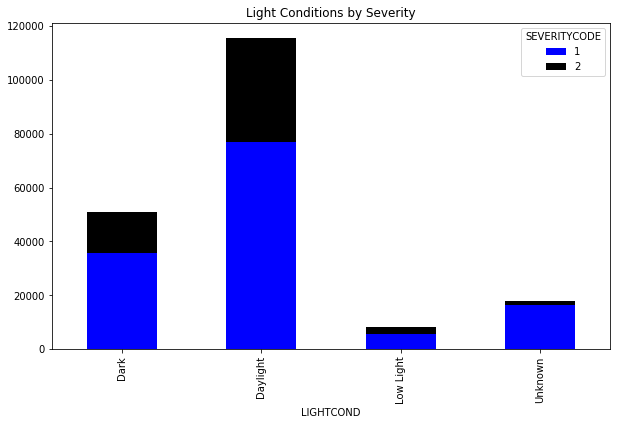

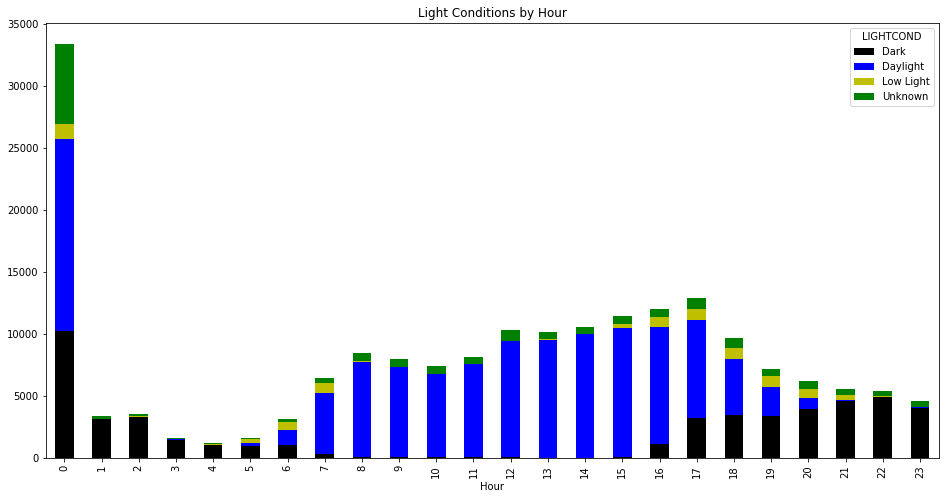

In [15]:
#light conditions.let's repalce other and null as Unknown
df["LIGHTCOND"].replace('Other','Unknown', inplace=True)
df["LIGHTCOND"].replace(np.nan, 'Unknown', inplace=True)
print("LIGHTCOND",df['LIGHTCOND'].value_counts().to_frame('count'))
df['LIGHTCOND'].isna().sum()
# let's classify the data
df["LIGHTCOND"].replace('Dusk','Low Light', inplace=True)
df["LIGHTCOND"].replace('Dawn','Low Light', inplace=True)
df["LIGHTCOND"].replace('Dark - No Street Lights','Dark', inplace=True)
df["LIGHTCOND"].replace('Dark - Street Lights On', 'Dark', inplace=True)
df["LIGHTCOND"].replace('Dark - Street Lights Off','Dark', inplace=True)
#plot  light condition by severity and hours in the day
df.pivot_table(index='LIGHTCOND',columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True , color = ('b','#000000'),figsize=(10, 6)   )
plt.title("Light Conditions by Severity");
df.pivot_table(index= ('Hour'),columns='LIGHTCOND', aggfunc='size').plot.bar(stacked=True , color = ('#000000','b','y','g'),figsize=(16, 8)   )
plt.title("Light Conditions by Hour");


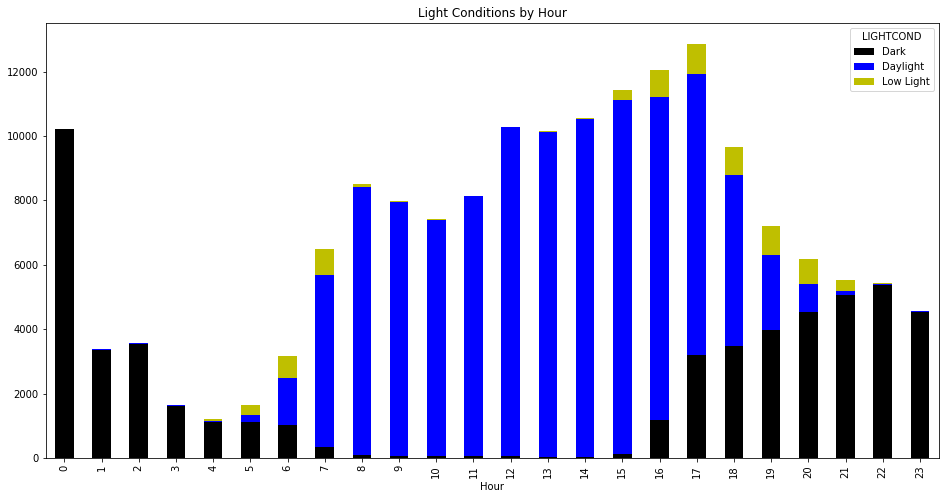

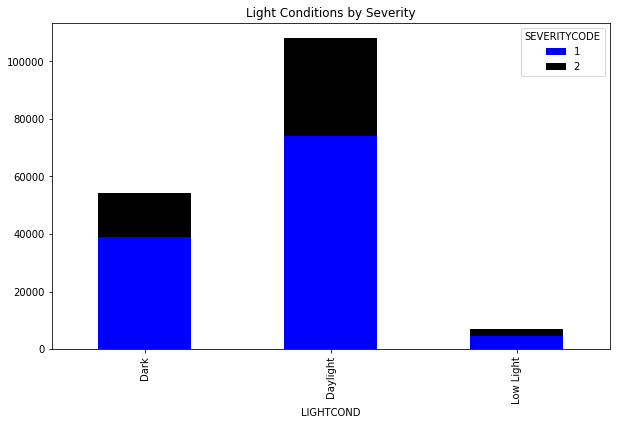

In [16]:
# fill the missing values
df = df[((df["Hour"] == 0 )& (df["LIGHTCOND"]=='Dark')) | (df["Hour"] != 0)]
df.loc[df['Hour'].isin([0,1,2,3,4,5,19,20,21,22,23])&(df["LIGHTCOND"]=='Unknown'), 'LIGHTCOND'] = 'Dark'
df.loc[(df['Hour'] >= 6)&(df['Hour'] <= 18)&(df["LIGHTCOND"]=='Unknown') ,'LIGHTCOND'] = 'Daylight'
df.pivot_table(index= ('Hour'),columns='LIGHTCOND', aggfunc='size').plot.bar(stacked=True , color = ('#000000','b','y','g') ,figsize=(16, 8)   )
plt.title("Light Conditions by Hour");
df.pivot_table(index='LIGHTCOND',columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True , color = ('b','#000000')  ,figsize=(10, 6)   )
plt.title("Light Conditions by Severity");

### Lets look at Weather column

WEATHER                           count
Clear                     99299
Raining                   30161
Overcast                  24651
Unknown                   13649
Snowing                     806
Fog/Smog/Smoke              547
Sleet/Hail/Freezing Rain     99
Blowing Sand/Dirt            51
Severe Crosswind             25
Unknown 0


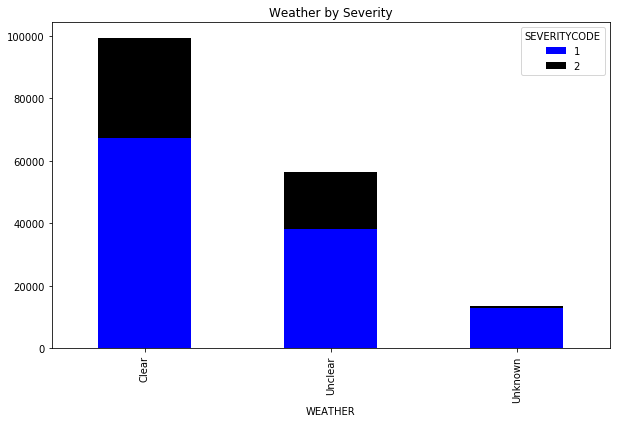

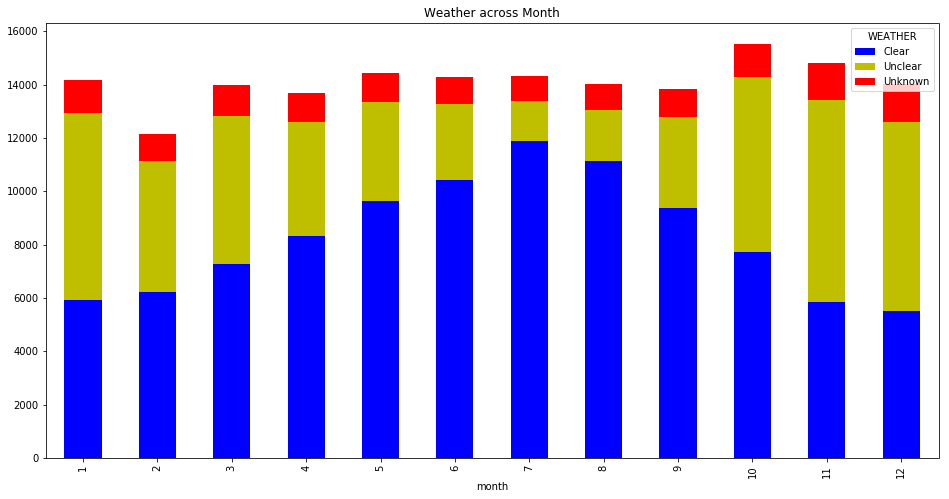

In [17]:
#replace other and nulls with unknown
df["WEATHER"].replace(np.nan,'Unknown', inplace=True)
df["WEATHER"].replace('Other','Unknown', inplace=True)
print("WEATHER",df['WEATHER'].value_counts().to_frame('count'))
print("Unknown",df['WEATHER'].isna().sum())
#let's classify weather in clear and not clear
df.loc[(df['WEATHER'] != 'Clear') & (df['WEATHER'] != 'Unknown'),'WEATHER'] = 'Unclear'
df.pivot_table(index='WEATHER',columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True, color = ('b','#000000')    ,figsize=(10, 6)   )
plt.title("Weather by Severity");
#how is waether in seatlle across the year
df.pivot_table(index= ('month'),columns='WEATHER', aggfunc='size').plot.bar(stacked=True , color = ('b','y','r')    ,figsize=(16, 8)   )
plt.title("Weather across Month");

### Lets look at Road Condition

ROADCOND                  count
Dry             110988
Wet              43042
Unknown          13023
Ice               1112
Snow/Slush         899
Standing Water     103
Sand/Mud/Dirt       64
Oil                 57
Unknown 0


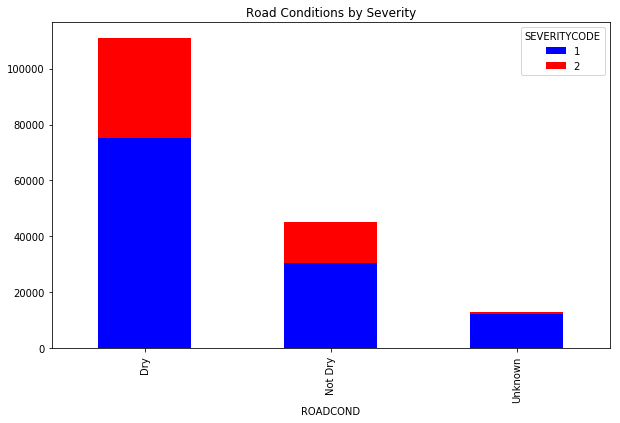

In [18]:
#let's take a look at road conditions 
df["ROADCOND"].replace(np.nan,'Unknown', inplace=True)
df["ROADCOND"].replace('Other','Unknown', inplace=True)
print("ROADCOND",df['ROADCOND'].value_counts().to_frame('count'))
print("Unknown",df['ROADCOND'].isna().sum())
#classify watroad condition her as dry and not dry, there are lot of unknonws huh
df.loc[(df['ROADCOND'] != 'Dry') & (df['ROADCOND'] != 'Unknown'),'ROADCOND'] = 'Not Dry'
df.pivot_table(index='ROADCOND',columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True, color = ('b','r')    ,figsize=(10, 6)   )
plt.title("Road Conditions by Severity");

In [19]:
#creating a key with date and location
df["Key1"]=df['INCDATE'].astype(str)+df['LOCATION']

ROADCOND           count
Dry      111033
Not Dry   46307
Unknown   11948
Unknown 0


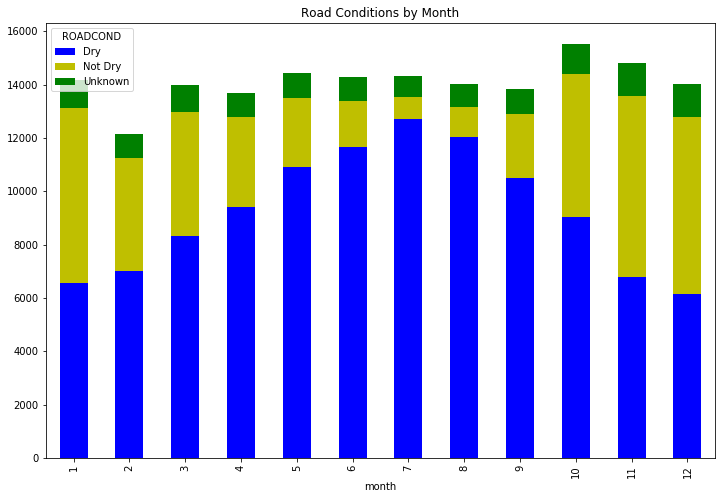

In [20]:
#using the key's let's repalce unknown
df_notnull=df.loc[df['ROADCOND']!='Unknown']
df_notnull = df_notnull[['Key1','ROADCOND']]                    
df_notnull.drop_duplicates(inplace=True) 
df_notnull.set_index('Key1',inplace=True) 
s=df_notnull.to_dict()['ROADCOND']
df.loc[df['ROADCOND']=='Unknown','ROADCOND']=df[('Key1')].map(s)
df["ROADCOND"].replace(np.nan,'Unknown', inplace=True)
print("ROADCOND",df['ROADCOND'].value_counts().to_frame('count'))
print("Unknown",df['ROADCOND'].isna().sum())
#stil unknowns huh
df.pivot_table(index= ('month'),columns='ROADCOND', aggfunc='size').plot.bar(stacked=True , color = ('b','y','g') ,figsize=(12, 8)  )
plt.title("Road Conditions by Month");

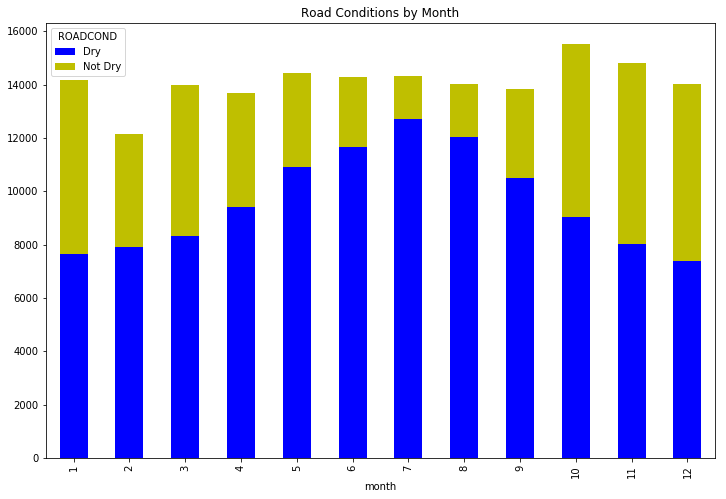

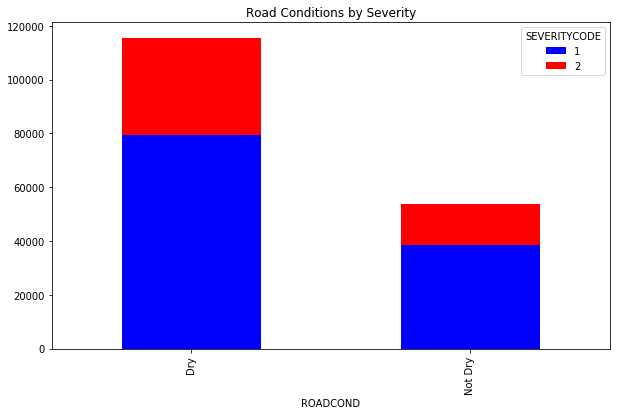

In [21]:
#as road conditions are dry and not dry, we can say that road in seatlle are mostly dry during match to oct. with this assumption let's remove the nulls/unknows
df.loc[df['month'].isin([1,2,11,12])&(df["ROADCOND"]=='Unknown'), 'ROADCOND'] = 'Dry'
df.loc[(df['month'] >= 3)&(df['month'] <= 10)&(df["ROADCOND"]=='Unknown') ,'ROADCOND'] = 'Not Dry'
df.pivot_table(index= ('month'),columns='ROADCOND', aggfunc='size').plot.bar(stacked=True , color = ('b','y','g') ,figsize=(12, 8)  )
plt.title("Road Conditions by Month");
df.pivot_table(index='ROADCOND',columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True, color = ('b','r')    ,figsize=(10, 6)   )
plt.title("Road Conditions by Severity");


COLLISIONTYPE             count
Parked Car  42337
Angles      31100
Rear Ended  30278
Other       21085
Sideswipe   16637
Left Turn   12351
Pedestrian   6068
Cycles       4937
Right Turn   2626
Head On      1848
Unknown 21
[23 22 51 50 21 52 66 40 57 56 41 17 67 49 31 65 42 48 64 53 54 60 43 87
 85 88 18]


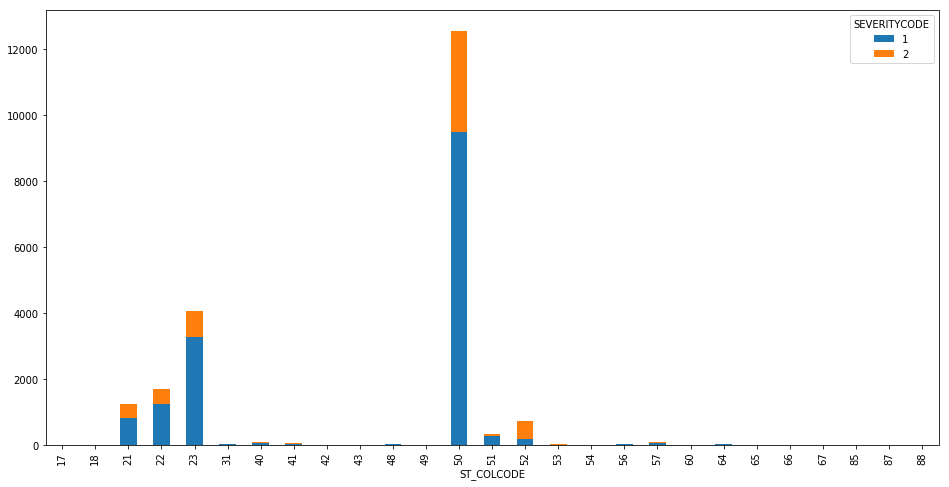

In [22]:
#there are lots of other data in collsion type, only 21 unknows let's get rid of it
print("COLLISIONTYPE",df['COLLISIONTYPE'].value_counts().to_frame('count'))
print("Unknown",df['COLLISIONTYPE'].isna().sum())
df = df[df["COLLISIONTYPE"].notna()]
#let's use ST_COLCODE to fill other value, first let's map the ercords where colllsion type as other with ST_COLCODE 
dfcollision = df[(df["COLLISIONTYPE"]=='Other')]
dfcollision=dfcollision[["ST_COLCODE","COLLISIONTYPE","SEVERITYCODE"]]
dfcollision.reset_index(inplace=True,drop = True)
dfcollision = dfcollision[dfcollision["ST_COLCODE"].notna()]
dfcollision = dfcollision[dfcollision["ST_COLCODE"] !=' ']
#dfcollision.drop_duplicates(inplace=True)
dfcollision[["ST_COLCODE"]] = dfcollision[['ST_COLCODE']].astype("int")
dfcollision.pivot_table(index= ('ST_COLCODE'),columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True ,figsize=(16, 8)   )
print(dfcollision["ST_COLCODE"].unique())

(169267, 29)
(168791, 28)


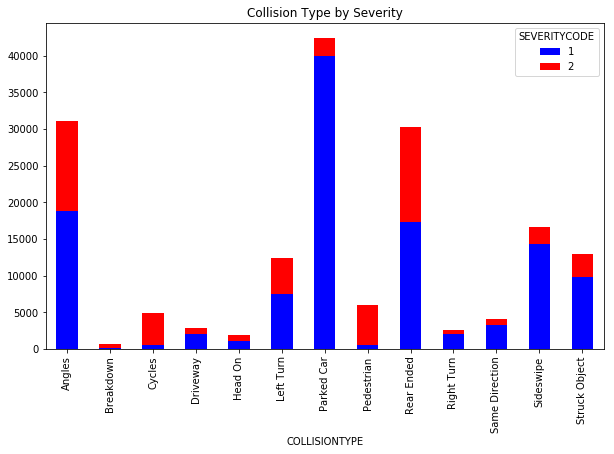

In [23]:
print(df.shape)
df = df[df["ST_COLCODE"].notna()]
df = df[df["ST_COLCODE"] !=' ']
df[["ST_COLCODE"]] = df[['ST_COLCODE']].astype("int")
#dropping thise which are not in metadata or very less values
df = df[~df["ST_COLCODE"].isin([17,18,31,40,41,42,43,48,49,53,54,56,57,60,64,65,66,67,85,87,88])]
#based in metadata  let's repalce collsion type
df.loc[df['ST_COLCODE'].isin([51,50]), 'COLLISIONTYPE'] = 'Struck Object'
df.loc[df['ST_COLCODE'].isin([21,22]), 'COLLISIONTYPE'] = 'Driveway'
df.loc[df['ST_COLCODE'].isin([52]), 'COLLISIONTYPE'] = 'Breakdown'
df.loc[df['ST_COLCODE'].isin([23]), 'COLLISIONTYPE'] = 'Same Direction'
df.drop(columns=[ 'ST_COLCODE'],axis=1,inplace=True)
print(df.shape)
df.pivot_table(index='COLLISIONTYPE',columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True, color = ('b','r') ,figsize=(10,6)  )
plt.title("Collision Type by Severity");

ADDRTYPE                count
Block         109584
Intersection   56961
Alley           2246
is null 0


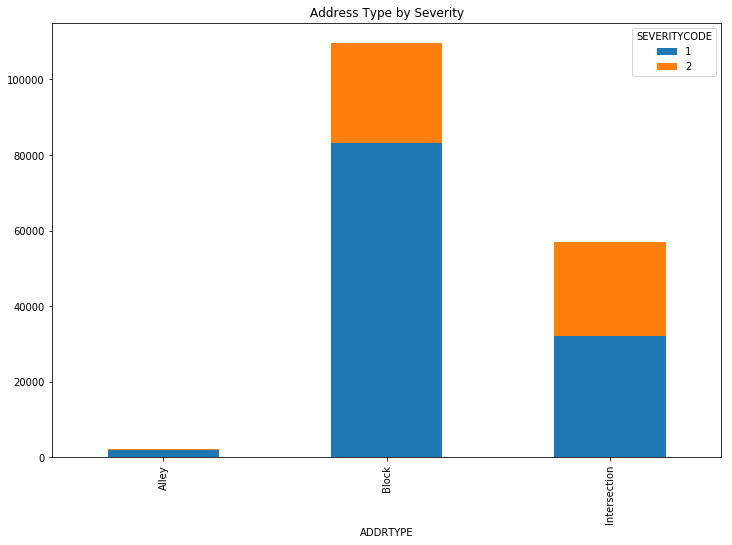

In [24]:
# Lets look at Address type
#as earlier, replace the null 
df["ADDRTYPE"].replace(np.nan,'Unknown', inplace=True)
df_notnull=df.loc[df['ADDRTYPE']!='Unknown']
df_notnull = df_notnull[['LOCATION','ADDRTYPE']]                    
df_notnull.drop_duplicates(inplace=True) 
#let's use location to determine missing addresstype 
df_notnull.set_index('LOCATION',inplace=True) 
s=df_notnull.to_dict()['ADDRTYPE']
df.loc[df['ADDRTYPE']=='Unknown','ADDRTYPE']=df[('LOCATION')].map(s)
print("ADDRTYPE",df['ADDRTYPE'].value_counts().to_frame('count'))
print("is null",df['ADDRTYPE'].isna().sum())
df.pivot_table(index= ('ADDRTYPE'),columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True  ,figsize=(12, 8)  )
plt.title("Address Type by Severity");

JUNCTIONTYPE                                                    count
Mid-Block (not related to intersection)            77985
At Intersection (intersection related)             54891
Mid-Block (but intersection related)               19245
Driveway Junction                                   8939
Unknown                                             5655
At Intersection (but not related to intersection)   1920
Ramp Junction                                        156
Unknown 0


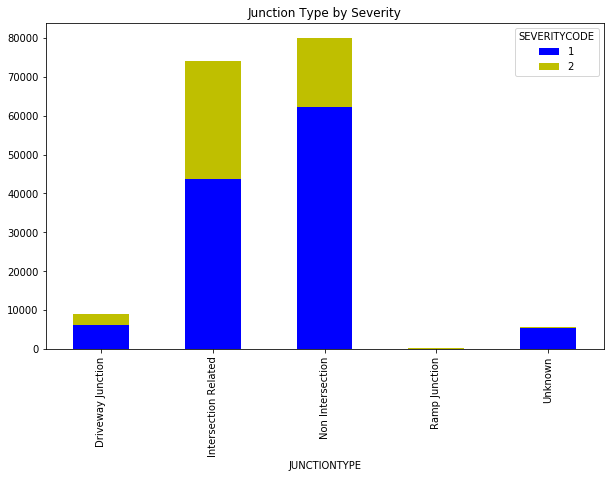

In [25]:
#let's take a look at junction type
df["JUNCTIONTYPE"].replace(np.nan,'Unknown', inplace=True)
print("JUNCTIONTYPE",df['JUNCTIONTYPE'].value_counts().to_frame('count'))
print("Unknown",df['JUNCTIONTYPE'].isna().sum())
#we can classify the below values to intersection related or not
df['JUNCTIONTYPE'] = df['JUNCTIONTYPE'].replace({
   'Mid-Block (not related to intersection)':'Non Intersection' ,
   'At Intersection (intersection related)': 'Intersection Related',
   'Mid-Block (but intersection related)': 'Intersection Related',
   'At Intersection (but not related to intersection)':'Non Intersection',
    np.nan:'Unknown'
  })
df.pivot_table(index= ('JUNCTIONTYPE'),columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True , color = ('b','y') ,figsize=(10, 6)  )
plt.title("Junction Type by Severity");

JUNCTIONTYPE                       count
Non Intersection      81542
Intersection Related  75216
Driveway Junction      9740
Ramp Junction          1998
is null 295


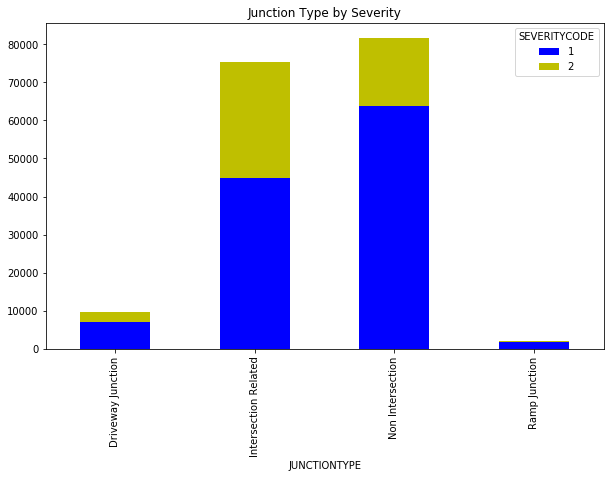

In [26]:
#let's deal with unknowns, how about using location again? 
df_notnull=df.loc[df['JUNCTIONTYPE']!='Unknown']
df_notnull = df_notnull[['LOCATION','JUNCTIONTYPE']]                    
df_notnull.drop_duplicates(inplace=True) 
df_notnull.set_index('LOCATION',inplace=True) 
s=df_notnull.to_dict()['JUNCTIONTYPE']
df.loc[df['JUNCTIONTYPE']=='Unknown','JUNCTIONTYPE']=df[('LOCATION')].map(s)
print("JUNCTIONTYPE",df['JUNCTIONTYPE'].value_counts().to_frame('count'))
print("is null",df['JUNCTIONTYPE'].isna().sum())
df["JUNCTIONTYPE"].replace(np.nan,'Unknown', inplace=True)

#works perfectly only 295 unknowns, lets delete these records
df = df[df["JUNCTIONTYPE"] != 'Unknown']
df.pivot_table(index= ('JUNCTIONTYPE'),columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True , color = ('b','y') ,figsize=(10, 6)  )
plt.title("Junction Type by Severity");

In [27]:
#dropping the key set earlier
df.drop(['Key1'],axis=1,inplace=True)

In [28]:
df['LOCATION'].value_counts()

BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N                          244
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB                          243
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N                                228
6TH AVE AND JAMES ST                                                                    215
ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ON RP AND SENECA ST OFF RP                209
RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST                                   209
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST                                          207
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST                                          203
ALASKAN WY VI SB BETWEEN COLUMBIA ST ON RP AND ALASKAN WY VI SB EFR OFF RP              185
WEST SEATTLE BR EB BETWEEN ALASKAN WY VI NB ON RP AND DELRIDGE-W SEATTLE BR EB ON RP    171
AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N                                      

In [29]:
# let's drop the location. from the visualtion it is evident that at a loction both types of accidents may occure. we shall not use X & Y as features
df.drop(['LOCATION'],axis=1,inplace=True)
df=df.loc[(df['X'].notna())]

In [30]:
#as we see personcount is skewed and can't be used to detemrine severity
df.drop(['PERSONCOUNT'],axis=1,inplace=True)

In [31]:
#let's take a loot a pedcount, many accident's don't invlove pedesterians, but even if 1 pedest is invloved the risk of higher severity increases
pd.crosstab(df['PEDCOUNT'],df['SEVERITYCODE'])

SEVERITYCODE,1,2
PEDCOUNT,,
0,113027,44595
1,623,5463
2,15,196
3,1,19
4,0,4
5,0,1
6,0,1


In [32]:
def plotbyInt_values(df):
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphPerRow=3
    nGraphRow = round(nCol / nGraphPerRow)
    fig, ax = plt.subplots(nGraphRow, nGraphPerRow,figsize=(24,24))
    for variable, subplot in zip(columnNames, ax.flatten()):
        #print(df[variable])
        if (variable!=''):
            _= df.pivot_table(index=variable,columns=columnNames[0], aggfunc='size').plot.bar(stacked=True, ax=subplot)
            for label in subplot.get_xticklabels():
                label.set_rotation(90)
                
def plotbycharvalues(colname):
    for i in range (0,len(colname)):
        bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 7)
        g = sns.FacetGrid(df, col=colname[i], hue="SEVERITYCODE", palette="Set1", col_wrap=4)
        g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
        g.axes[-1].legend()
        plt.show()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


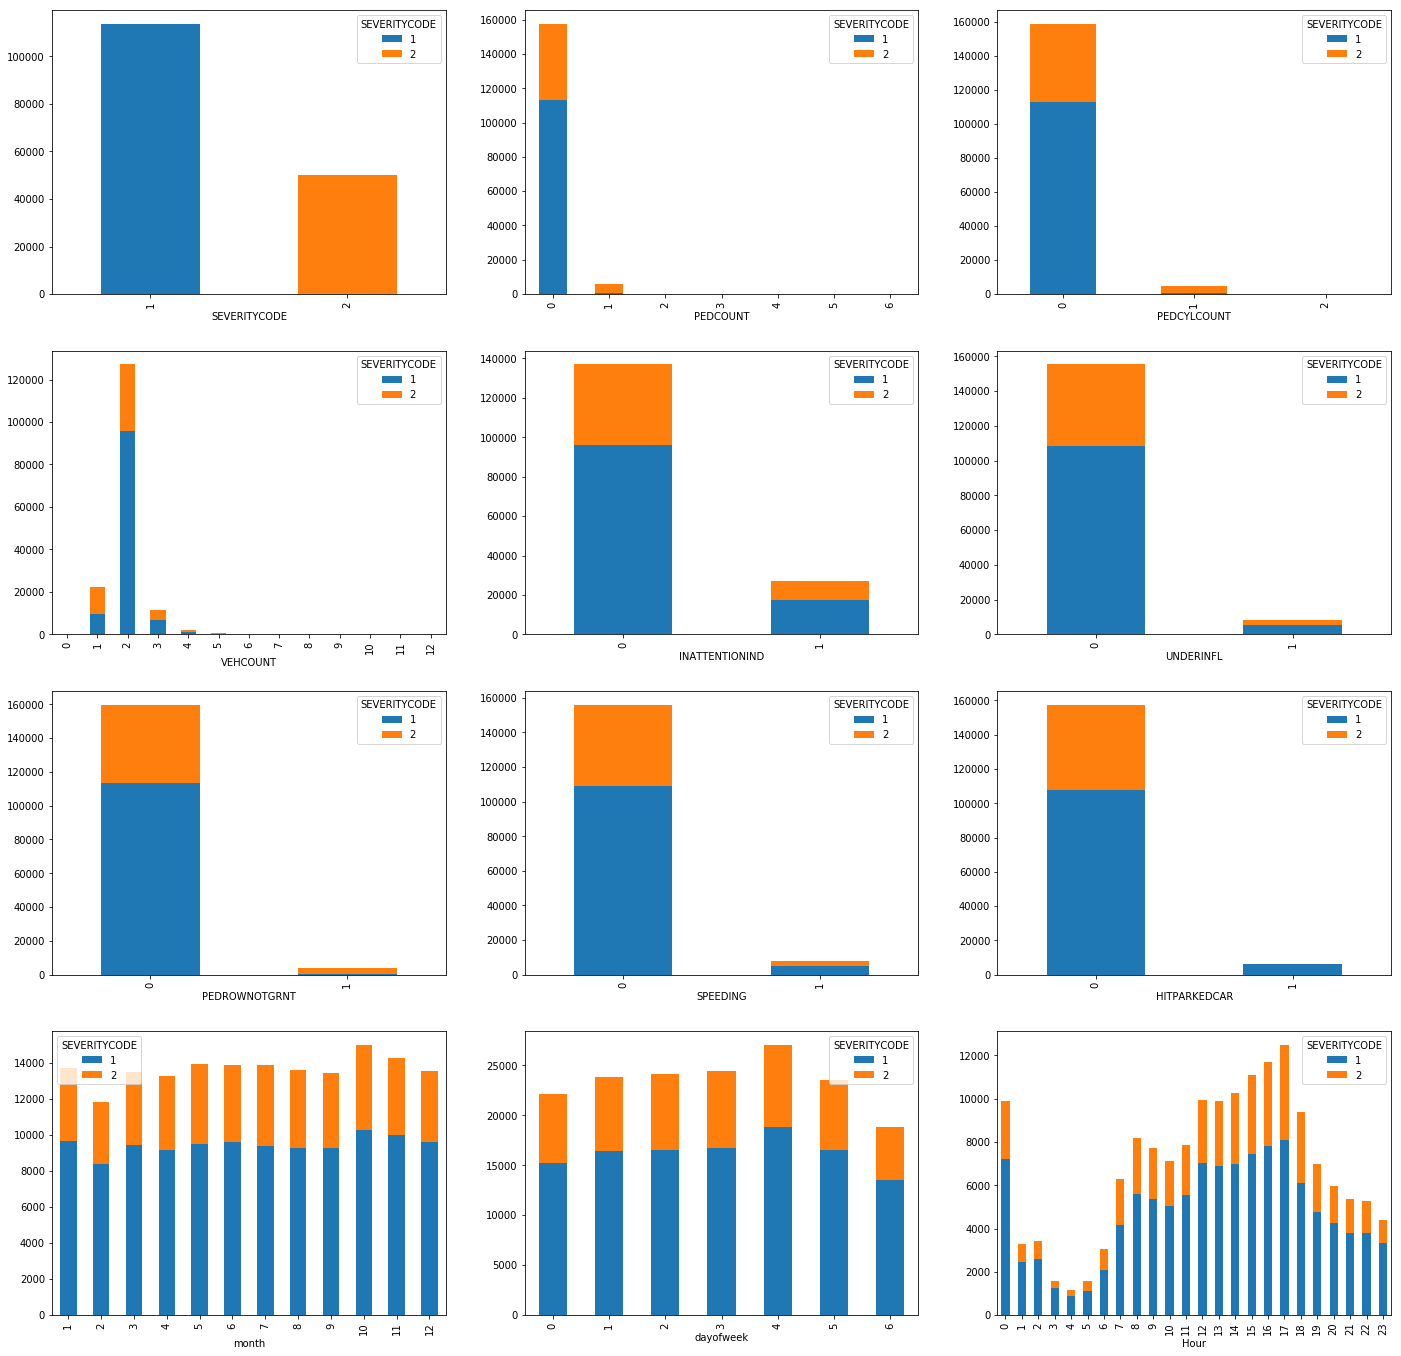

In [33]:
# let's visualize all numerical feature, we will drop year, dat , object id and lat long
numerical_features = df.select_dtypes(include=["number"])
numerical_features.drop(columns=[ 'X', 'Y', 'OBJECTID','year','day'],inplace=True)
plotbyInt_values(numerical_features)

In [34]:
#let's calulate P values for the numerical features
col_name = numerical_features.columns
#['VEHCOUNT', 'INATTENTIONIND','UNDERINFL','SPEEDING', 'HITPARKEDCAR', 'month','dayofweek','PERSONCOUNT']
percof_smry = pd.DataFrame({'Column Name': [], 'Pearson Correlation Coefficient': [], 'P-value of': []})
for i in range (0,len(col_name)):
    pearson_coef, p_value = stats.pearsonr(df[col_name[i]], df['SEVERITYCODE'])
    percof_smry = percof_smry.append({"Column Name":col_name[i],"Pearson Correlation Coefficient": pearson_coef , "P-value of": p_value }, ignore_index=True)
print(percof_smry)

       Column Name  Pearson Correlation Coefficient     P-value of
0     SEVERITYCODE                         1.000000   0.000000e+00
1         PEDCOUNT                         0.251260   0.000000e+00
2      PEDCYLCOUNT                         0.217308   0.000000e+00
3         VEHCOUNT                        -0.088293  5.472239e-281
4   INATTENTIONIND                         0.040823   2.024076e-61
5        UNDERINFL                         0.043036   4.628097e-68
6    PEDROWNOTGRNT                         0.208154   0.000000e+00
7         SPEEDING                         0.038202   5.235113e-54
8     HITPARKEDCAR                        -0.106033   0.000000e+00
9            month                         0.004744   5.473277e-02
10       dayofweek                        -0.017852   4.873732e-13
11            Hour                         0.024866   7.519528e-24


Index(['ADDRTYPE', 'COLLISIONTYPE', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE',
       'WEATHER', 'ROADCOND', 'LIGHTCOND'],
      dtype='object')


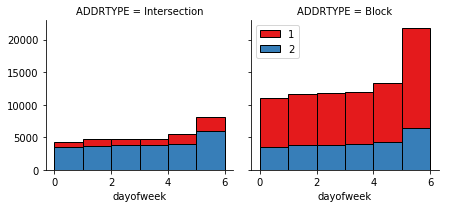

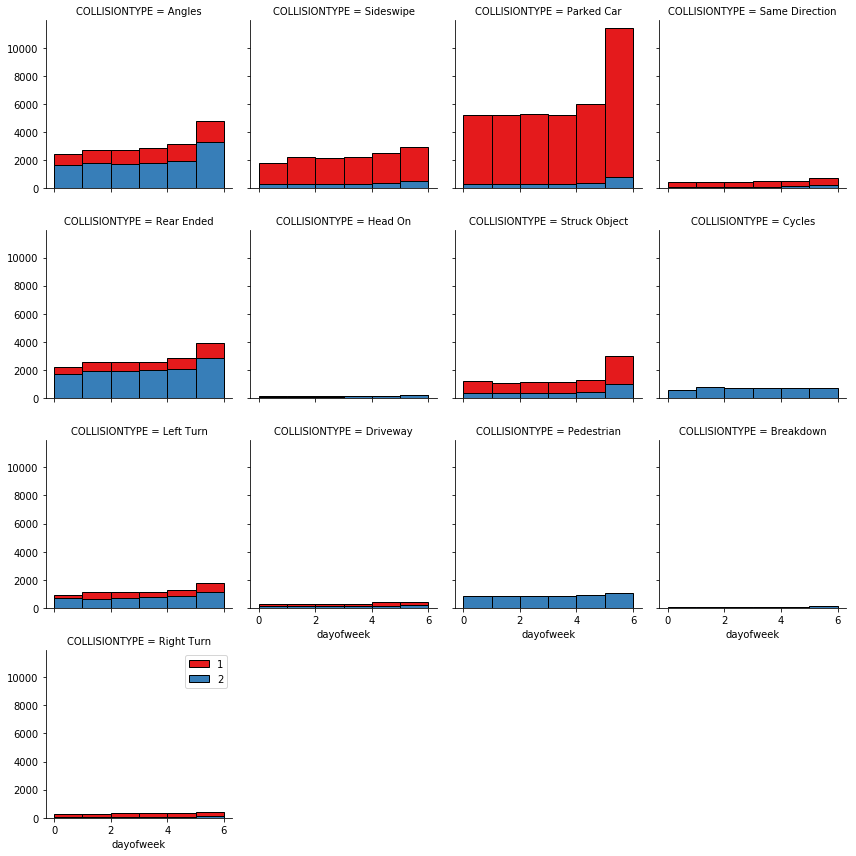

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f2663e68730> (for post_execute):


ValueError: Image size of 864x315576 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 864x315576 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 864x315576 with 1340 Axes>

In [35]:
#let's select all object type data and visualize them across the week
categorical_features = df.select_dtypes(exclude = [np.number, np.datetime64])#.columns.tolist()
char_value=(categorical_features.columns)
print(char_value)
plotbycharvalues(char_value)

In [36]:
#based on p values using pearce coefficient and avanova let's drop the below colums

df.drop(columns=[ 'OBJECTID','year','day','WEATHER','PEDCOUNT','PEDCYLCOUNT','PEDROWNOTGRNT','HITPARKEDCAR','month','INCDATE', 'INCDTTM','LIGHTCOND','ROADCOND'],axis=1,inplace=True)

In [37]:
df.drop(columns=[ 'X', 'Y'],axis=1,inplace=True)
df.columns

Index(['SEVERITYCODE', 'ADDRTYPE', 'COLLISIONTYPE', 'VEHCOUNT', 'JUNCTIONTYPE',
       'INATTENTIONIND', 'UNDERINFL', 'SPEEDING', 'dayofweek', 'Hour'],
      dtype='object')

In [38]:
#feature selection and co relation
df[['ADDRTYPE', 'COLLISIONTYPE', 'VEHCOUNT', 'JUNCTIONTYPE','INATTENTIONIND', 'UNDERINFL', 'SPEEDING','dayofweek', 'Hour']].head()

,ADDRTYPE,COLLISIONTYPE,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,SPEEDING,dayofweek,Hour
0,Intersection,Angles,2,Intersection Related,0,0,0,2,14
1,Block,Sideswipe,2,Non Intersection,0,0,0,2,18
2,Block,Parked Car,3,Non Intersection,0,0,0,3,10
3,Block,Same Direction,3,Non Intersection,0,0,0,4,9
4,Intersection,Angles,2,Intersection Related,0,0,0,2,8


In [39]:
Feature=df[['VEHCOUNT','INATTENTIONIND', 'UNDERINFL', 'SPEEDING','dayofweek', 'Hour']]

Feature = pd.concat([Feature,pd.get_dummies(df['ADDRTYPE'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df['COLLISIONTYPE'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df['JUNCTIONTYPE'])], axis=1)


In [40]:
X=Feature
Y=df['SEVERITYCODE']
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


array([[ 0.05066386, -0.44305149, -0.23442096, -0.22507796, -0.49508005,
         0.20463231, -1.37611473,  1.37611473,  2.07496789, -0.06562385,
        -0.17561691, -0.13360158, -0.10607005, -0.28453611, -0.57441792,
        -0.19519129, -0.4665927 , -0.12662019, -0.15622596, -0.33037161,
        -0.27887292, -0.25025023,  1.09356665, -0.96991171, -0.03066305],
       [ 0.05066386, -0.44305149, -0.23442096, -0.22507796, -0.49508005,
         0.86249008,  0.72668359, -0.72668359, -0.48193517, -0.06562385,
        -0.17561691, -0.13360158, -0.10607005, -0.28453611, -0.57441792,
        -0.19519129, -0.4665927 , -0.12662019, -0.15622596,  3.02689447,
        -0.27887292, -0.25025023, -0.914439  ,  1.03102168, -0.03066305],
       [ 1.82926899, -0.44305149, -0.23442096, -0.22507796,  0.02378729,
        -0.45322546,  0.72668359, -0.72668359, -0.48193517, -0.06562385,
        -0.17561691, -0.13360158, -0.10607005, -0.28453611,  1.74089275,
        -0.19519129, -0.4665927 , -0.12662019, -0

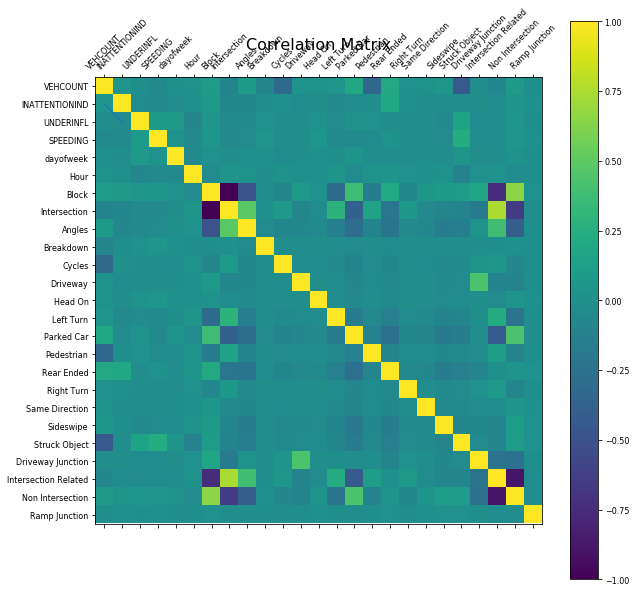

In [41]:
#let's visualize the correaltions
f = plt.figure(figsize=(10, 10))
plt.matshow(Feature.corr(), fignum=f.number)
plt.xticks(range(Feature.shape[1]), Feature.columns, fontsize=8, rotation=45)
plt.yticks(range(Feature.shape[1]), Feature.columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=8)
plt.title('Correlation Matrix', fontsize=16);
plt.plot([1,2])
f.savefig('test.png', bbox_inches='tight')

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (114761, 25) (114761,)
Test set: (49184, 25) (49184,)


# Model Selection

### KNN

In [43]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    KSEVERITY = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat=KSEVERITY.predict(X_test)
   
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)
    std_acc[n-1]=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])

print("mean accuracy is for differnt k is ", mean_acc)

mean accuracy is for differnt k is  [0.67416233 0.71834336 0.70303351 0.72997316 0.7160662  0.72983084
 0.72080351 0.73412085 0.727635   0.73586939 0.72991217 0.73672332
 0.73162004 0.73898016]


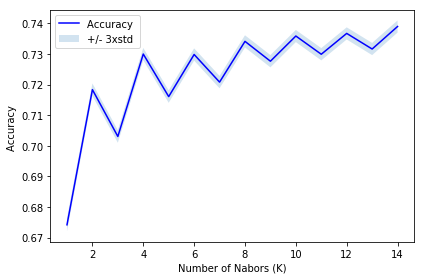

In [44]:
#plot accuracy to find the best K
plt.plot(range(1,Ks),mean_acc,'b')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.20)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [45]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7389801561483409 with k= 14


In [46]:
#implement the model with best value of K which is 14
k = 14
#Train Model and Predict  
KSEVERITY = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
print(KSEVERITY)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=14, p=2,
           weights='uniform')


### Logistic Regression

In [47]:
# will create the logistic regression first
from sklearn.linear_model import LogisticRegression

SEVERITYLR = LogisticRegression(C=0.01, solver="newton-cg").fit(X_train,Y_train)
yhat = SEVERITYLR.predict(X_test)
print(yhat [0:5])
yhat_prob = SEVERITYLR.predict_proba(X_test)
print(yhat_prob [0:5])

[1 1 2 1 1]
[[0.61538062 0.38461938]
 [0.91261761 0.08738239]
 [0.4684572  0.5315428 ]
 [0.62552966 0.37447034]
 [0.95291572 0.04708428]]


### Decesion Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

SEVERITYTree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
SEVERITYTree.fit(X_train,Y_train)
predTree = SEVERITYTree.predict(X_test)
print (predTree)

[1 1 1 ... 1 2 1]


In [49]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_test, predTree))

DecisionTrees's Accuracy:  0.7502033181522446


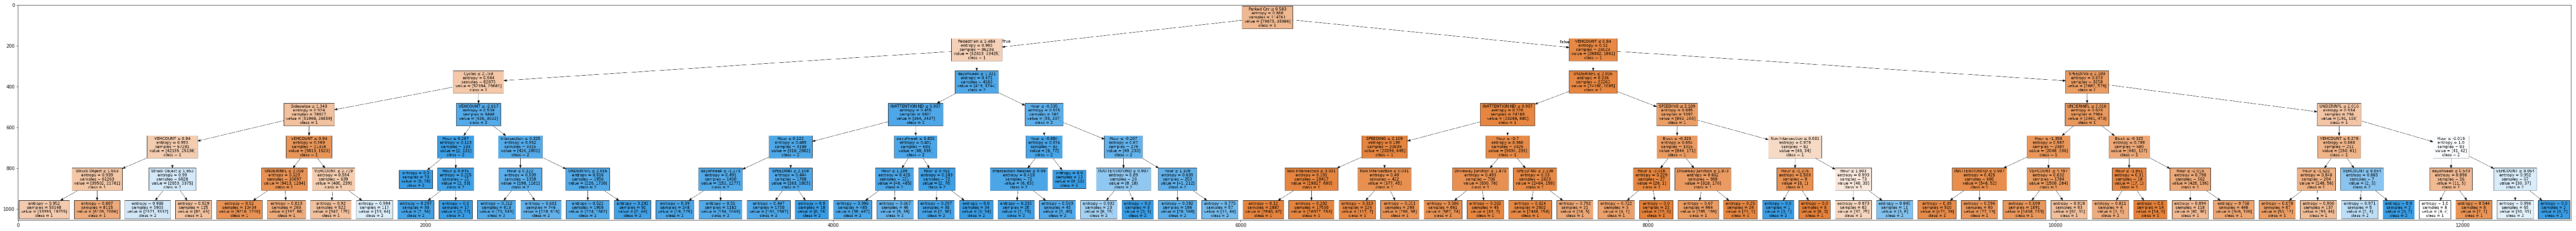

In [54]:
#!conda install -c anaconda graphviz -y
#!conda install -c anaconda pydotplus -y
#import graphviz
import pydotplus
import matplotlib.image as mpimg
from sklearn.externals.six import StringIO
from sklearn import tree

dot_data = StringIO()
filename = "Sevrtree.png"
featureNames = Feature.columns
targetNames = Y
out=tree.export_graphviz(SEVERITYTree,feature_names=featureNames, out_file=dot_data,  class_names= np.unique(Y_train).astype(str)
                         ,filled=True
                         ,special_characters=True
                         ,rotate=False
                        )  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100,120))
plt.imshow(img,interpolation='nearest') 

### SVM

In [55]:
from sklearn import svm


SEVERITYSVM = svm.SVC(kernel='sigmoid')
SEVERITYSVM.fit(X_train, Y_train) 
yhat = SEVERITYSVM.predict(X_test)
yhat [0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([1, 1, 1, 1, 1])

# Model Evaluation

In [56]:
df_Test=df

In [57]:
Feature_Eval=df_Test[['VEHCOUNT','INATTENTIONIND', 'UNDERINFL', 'SPEEDING','dayofweek', 'Hour']]

Feature_Eval = pd.concat([Feature_Eval,pd.get_dummies(df['ADDRTYPE'])], axis=1)
Feature_Eval = pd.concat([Feature_Eval,pd.get_dummies(df['COLLISIONTYPE'])], axis=1)
Feature_Eval = pd.concat([Feature_Eval,pd.get_dummies(df['JUNCTIONTYPE'])], axis=1)

In [58]:
X_Eval=Feature_Eval

print(X_Eval.head())
Y_Eval=df_Test['SEVERITYCODE']

X_Eval= preprocessing.StandardScaler().fit(X_Eval).transform(X_Eval)
X_Eval[0:1]

   VEHCOUNT  INATTENTIONIND  UNDERINFL  SPEEDING  dayofweek  Hour  Block  \
0         2               0          0         0          2    14      0   
1         2               0          0         0          2    18      1   
2         3               0          0         0          3    10      1   
3         3               0          0         0          4     9      1   
4         2               0          0         0          2     8      0   

   Intersection  Angles  Breakdown  ...  Pedestrian  Rear Ended  Right Turn  \
0             1       1          0  ...           0           0           0   
1             0       0          0  ...           0           0           0   
2             0       0          0  ...           0           0           0   
3             0       0          0  ...           0           0           0   
4             1       1          0  ...           0           0           0   

   Same Direction  Sideswipe  Struck Object  Driveway Junction  \
0 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.


array([[ 0.05066386, -0.44305149, -0.23442096, -0.22507796, -0.49508005,
         0.20463231, -1.37611473,  1.37611473,  2.07496789, -0.06562385,
        -0.17561691, -0.13360158, -0.10607005, -0.28453611, -0.57441792,
        -0.19519129, -0.4665927 , -0.12662019, -0.15622596, -0.33037161,
        -0.27887292, -0.25025023,  1.09356665, -0.96991171, -0.03066305]])

## Let's Calculate F1 score, Jaccard score and logloss

In [59]:
KSEVERITY_yhat = KSEVERITY.predict(X_Eval)
KSEVERITY_yhat_prob = KSEVERITY.predict_proba(X_Eval)

KNN_jaccard=jaccard_similarity_score(Y_Eval, KSEVERITY_yhat)
KNN_f1=f1_score(Y_Eval, KSEVERITY_yhat, average='weighted')
KNN_LogLoss=log_loss(Y_Eval, KSEVERITY_yhat_prob)

In [ ]:
SEVERITYTree_yhat = SEVERITYTree.predict(X_Eval)
SEVERITYTree_yhat_prob = SEVERITYTree.predict_proba(X_Eval)
DT_jaccard=jaccard_similarity_score(Y_Eval, SEVERITYTree_yhat)
DT_f1=f1_score(Y_Eval, SEVERITYTree_yhat, average='weighted')
DT_LogLoss=log_loss(Y_Eval, SEVERITYTree_yhat_prob)

In [ ]:
SEVERITYLR_yhat = SEVERITYLR.predict(X_Eval)
SEVERITYLR_yhat_prob = SEVERITYLR.predict_proba(X_Eval)
LR_jaccard=jaccard_similarity_score(Y_Eval, SEVERITYLR_yhat)
LR_f1=f1_score(Y_Eval, SEVERITYLR_yhat, average='weighted')
LR_logloss=log_loss(Y_Eval, SEVERITYLR_yhat_prob)

In [ ]:
SEVERITYSVM_yhat = SEVERITYSVM.predict(X_Eval)
SVM_jaccard=jaccard_similarity_score(Y_Eval, SEVERITYSVM_yhat)
SVM_f1=f1_score(Y_Eval, SEVERITYSVM_yhat, average='weighted')

In [ ]:
Report_dic={'Algorith':['KNN','Decision Tree','SVM', 'Logistic Regression'],'Jaccard':[KNN_jaccard,DT_jaccard,SVM_jaccard,LR_jaccard],'F1-Score':[KNN_f1,DT_f1,SVM_f1,LR_f1],'LogLoss':[KNN_LogLoss,DT_LogLoss,'NA',LR_logloss]}
,

pd.DataFrame.from_dict(Report_dic)